# Telecom Churn Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. Retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

Here we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Business Objective 

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Importing the Data

In [2]:
# Reading the data

data = pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
data.shape

(99999, 226)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### Exploratory Data Analysis

Let us look at some of the features which may have an impact of the study

In [6]:
data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [7]:
# circle_id

data['circle_id'].value_counts()

109    99999
Name: circle_id, dtype: int64

We see that all the data which is being studied is from the same Telecom Circle Area. Hence, the feature will be dropped as it does not add any insights.

In [8]:
# let us observe calls to find columns which are not important and can be dropped
# Operator T to other operator fixed line - T2O

data[["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou"]].apply(pd.Series.value_counts)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou
0.0,98981,98981,98981


In [9]:
# Since we observe that there are no calls happening from operator T to other operator fixed line -
# we can observe all the other columns related to T20 if any additional information is added else remove them too

data[["std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8", "std_ic_t2o_mou_9"]].apply(pd.Series.value_counts)

,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0.0,96062,96140,94621,92254


In [10]:
# Analyse the calls made to Customer Care in the last 4 months

data[["std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8", "std_og_t2c_mou_9"]].apply(pd.Series.value_counts)

,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9
0.0,96062,96140,94621,92254


In [11]:
# Let us remove all the above columns analysed along with mobile_number as they do not add any value to the analysis

data.drop(["mobile_number","circle_id","loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou"],axis=1,inplace=True)
data.drop(["std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8", "std_ic_t2o_mou_9"],axis=1,inplace=True)
data.drop(["std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8", "std_og_t2c_mou_9"],axis=1,inplace=True)

In [12]:
data.shape

(99999, 213)

In [13]:
data.columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
       'onnet_mou_6', 'onnet_mou_7',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=213)

#### Let us see the values of Average Revenue per User (ARPU) in the 4 months

In [14]:
print("ARPU - June")
print("Minimum: {min}".format(min = min(data['arpu_6'])))
print("Maximum: {max}".format(max = max(data['arpu_6'])))

ARPU - June
Minimum: -2258.709
Maximum: 27731.088


In [15]:
print("ARPU - July")
print("Minimum: {min}".format(min = min(data['arpu_7'])))
print("Maximum: {max}".format(max = max(data['arpu_7'])))

ARPU - July
Minimum: -2014.045
Maximum: 35145.834


In [16]:
print("ARPU - Aug")
print("Minimum: {min}".format(min = min(data['arpu_8'])))
print("Maximum: {max}".format(max = max(data['arpu_8'])))

ARPU - Aug
Minimum: -945.808
Maximum: 33543.624


In [17]:
print("ARPU - Sept")
print("Minimum: {min}".format(min = min(data['arpu_9'])))
print("Maximum: {max}".format(max = max(data['arpu_9'])))

ARPU - Sept
Minimum: -1899.505
Maximum: 38805.617


We see there there was an increase in the ARPU in Sept month

#### Analyse the Age of Network feature

In [18]:
# customers who are with the network from more than a year

oldCustomers = data[data['aon'] >= 365 ]
oldCustomers.shape

(82876, 213)

In [19]:
# customers who are with the network for less than a year

newCustomers = data[data['aon'] < 365 ]
newCustomers.shape

(17123, 213)

In [20]:
len(oldCustomers)/len(data) * 100

82.87682876828768

We observe that more than 80% of data is of old customers who are with the network from more than a year

In [21]:
data['aon'].isnull().sum()

0

In [22]:
data.columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
       'onnet_mou_6', 'onnet_mou_7',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=213)

All the columns related to recharge, calls(loc, std, iSD), internet will be of priority and we will keep them

### Filtering High Value Customers

In churn prediction, we assume that there are three phases of customer lifecycle:
    <br>1) June & July - the first 2 months are the ‘good’ phase - the customer is happy with the service and behaves as usual.
    <br>2) August - the third month is the ‘action’ phase - customer experience starts to sore in this phase
    <br>3) September - the fourth month is the ‘churn’ phase -the customer is said to have churned

In [23]:
# Get all the columns containing recharge

recharge_columns = data.columns[data.columns.str.contains('rech')]
recharge_columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

From the above features we can consider total_rech_amt_*(Total recharge amount), max_rech_amt_*(Maximum recharge amount), 
total_rech_data_*(Total recharge of data), max_rech_data_*(Maximum recharge data) and av_rech_amt_data_*(Average recharge amount for data) for analysis.

In [24]:
rech_filt_columns = ['total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9','total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9','av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
rech_filt_columns

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [25]:
(data.loc[:, rech_filt_columns].isnull().sum() * 100) / len(data)

total_rech_amt_6       0.000000
total_rech_amt_7       0.000000
total_rech_amt_8       0.000000
total_rech_amt_9       0.000000
max_rech_amt_6         0.000000
max_rech_amt_7         0.000000
max_rech_amt_8         0.000000
max_rech_amt_9         0.000000
total_rech_data_6     74.846748
total_rech_data_7     74.428744
total_rech_data_8     73.660737
total_rech_data_9     74.077741
max_rech_data_6       74.846748
max_rech_data_7       74.428744
max_rech_data_8       73.660737
max_rech_data_9       74.077741
av_rech_amt_data_6    74.846748
av_rech_amt_data_7    74.428744
av_rech_amt_data_8    73.660737
av_rech_amt_data_9    74.077741
dtype: float64

We see that data related recharges - total_rech_data_* , max_rech_data_* and av_rech_amt_data_* are having more than 73% null values

In [26]:
data[rech_filt_columns].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000



We will create new feature as total_rech_amt_data using total_rech_data and av_rech_amt_data to capture amount utilized by customer for data.

Since the minimum value is 1 we will impute the NA values by 0, Considering there were no recharges done by the custome

In [27]:
data['total_rech_data_6'].fillna(value=0.0, inplace=True)
data['total_rech_data_7'].fillna(value=0.0, inplace=True)
data['total_rech_data_8'].fillna(value=0.0, inplace=True)
data['total_rech_data_9'].fillna(value=0.0, inplace=True)

data['av_rech_amt_data_6'].fillna(value=0.0, inplace=True)
data['av_rech_amt_data_7'].fillna(value=0.0, inplace=True)
data['av_rech_amt_data_8'].fillna(value=0.0, inplace=True)
data['av_rech_amt_data_9'].fillna(value=0.0, inplace=True)

In [28]:
data['total_rech_amt_data_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_rech_amt_data_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']
data['total_rech_amt_data_8'] = data['total_rech_data_8'] * data['av_rech_amt_data_8']
data['total_rech_amt_data_9'] = data['total_rech_data_9'] * data['av_rech_amt_data_9']

High Value Customers: Those who have recharged with an amount more than or equal to X, 
    where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [29]:
data['avg_rech_amt_goodPhase'] = (data['total_rech_amt_6'] + data['total_rech_amt_data_6'] + data['total_rech_amt_7'] + data['total_rech_amt_data_7']) / 2

In [30]:
high_val_filter = data['avg_rech_amt_goodPhase'].quantile(0.7)
high_val_filter

478.0

In [31]:
# High Value Customers

data_high_val_cust = data[data['avg_rech_amt_goodPhase'] > high_val_filter]
data_high_val_cust.shape

(29953, 218)

### Tag churners and remove attributes of the churn phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

In [32]:
data_high_val_cust[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74
...,...,...,...,...
99981,391.63,64.21,0.00,0.00
99984,149.26,14.44,723.41,232.56
99986,547.11,1095.24,9.14,941.48
99988,265.84,182.16,0.05,393.34


In [33]:
# checking for missing values

data_high_val_cust[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [34]:
churned_list = (data_high_val_cust['total_ic_mou_9'] == 0) & (data_high_val_cust['total_og_mou_9'] ==0) & (data_high_val_cust['vol_2g_mb_9'] == 0) & (data_high_val_cust['vol_3g_mb_9'] == 0)

In [35]:
churned_list

0         True
7         True
8        False
21       False
23       False
         ...  
99981    False
99984    False
99986    False
99988    False
99997    False
Length: 29953, dtype: bool

In [36]:
data_high_val_cust['churn'] = np.where(churned_list, 1, 0)

In [37]:
#validating if churn is done correctly

data_high_val_cust[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'churn']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.00,0.00,0.00,0.00,1
7,0.00,0.00,0.00,0.00,1
8,34.91,142.18,0.00,0.00,0
21,252.61,1031.53,0.00,0.00,0
23,127.48,127.63,13.93,314.74,0
...,...,...,...,...,...
99981,391.63,64.21,0.00,0.00,0
99984,149.26,14.44,723.41,232.56,0
99986,547.11,1095.24,9.14,941.48,0
99988,265.84,182.16,0.05,393.34,0


In [38]:
# Remove all the features corresponding to churn phase

churn_col = data_high_val_cust.columns[data_high_val_cust.columns.str.contains('_9')]
churn_col

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9',
       'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
       'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9',
       'sachet_2g_9', 'mon

In [39]:
data_high_val_cust.drop(churn_col, axis=1, inplace=True)
data_high_val_cust.columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8', 'avg_rech_amt_goodPhase', 'churn'],
      dtype='object', length=166)

In [40]:
# churned percentage

(data_high_val_cust['churn'].sum() * 100) / len(data_high_val_cust)

8.122725603445398

In [41]:
data_high_val_cust.shape

(29953, 166)

### Continuing with EDA for the new dataset

In [42]:
data_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 166 entries, last_date_of_month_6 to churn
dtypes: float64(131), int32(1), int64(25), object(9)
memory usage: 38.0+ MB


In [43]:
data_high_val_cust.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,avg_rech_amt_goodPhase,churn
count,29953.000000,29953.000000,29953.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,...,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,558.820058,561.160547,508.890301,265.708886,272.935850,243.888097,380.688975,385.124799,348.769656,16.421142,...,1209.280573,169.276670,179.057629,158.731865,8.037804,456.387566,528.958341,463.640890,1153.701715,0.081227
std,460.868223,480.028497,502.136278,462.692744,483.282132,465.505577,484.441095,501.024091,486.836956,77.012820,...,957.449442,421.128001,443.756247,416.989501,52.413217,1419.713940,1477.097887,1623.839242,1359.533621,0.273188
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,478.500000,0.000000
25%,310.142000,310.071000,231.615000,19.250000,18.180000,14.280000,78.550000,76.180000,58.760000,0.000000,...,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,604.000000,0.000000
50%,482.354000,481.496000,427.604000,88.140000,86.890000,72.990000,229.630000,227.130000,197.690000,0.000000,...,846.000000,0.000000,0.000000,0.000000,0.000000,92.000000,100.000000,25.000000,800.500000,0.000000
75%,700.240000,698.829000,661.753000,297.490000,298.380000,255.310000,494.755000,500.480000,455.440000,0.000000,...,1756.000000,129.130000,137.860000,98.750000,0.000000,400.000000,575.000000,308.000000,1209.000000,0.000000
max,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,2613.310000,...,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,105644.000000,55080.000000,89106.500000,61236.000000,1.000000


In [45]:
# we will drop last_date_of_month_* column it does not add any value

data_high_val_cust.drop(['last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8'], axis=1, inplace=True)

In [46]:
data_high_val_cust.shape

(29953, 163)

In [47]:
# Create boxplot
def plot_box_chart(attr):
    plt.figure(figsize=(20,10))
    plt.subplot(2,3,1)
    sns.boxplot(data=data_high_val_cust, x='churn', y=attr+'_6', showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=data_high_val_cust, x='churn', y=attr+'_7', showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=data_high_val_cust, x='churn', y=attr+'_8', showfliers=False)
    plt.show()

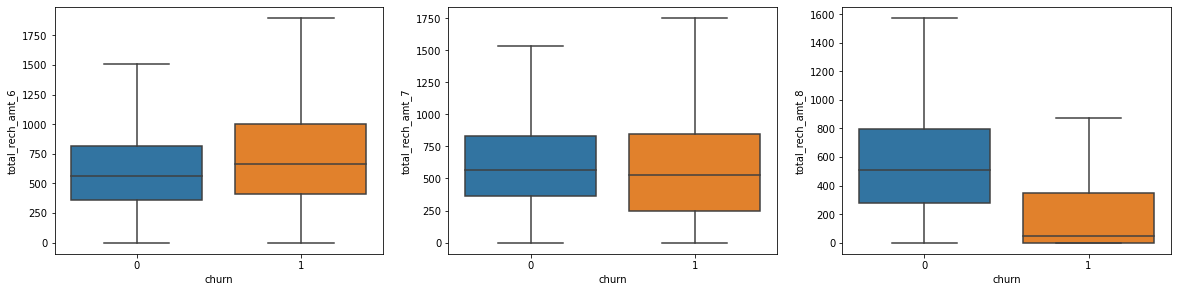

In [48]:
# Total Recharge amount
plot_box_chart('total_rech_amt')
# We see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).

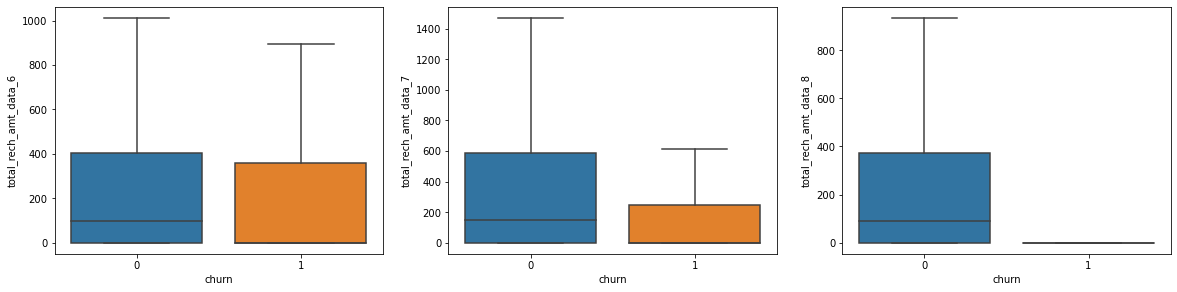

In [49]:
# Total Recharge amount data

plot_box_chart('total_rech_amt_data')

We see a huge drop in the total recharge amount of data for churned customers in the 8th Month (Action Phase).

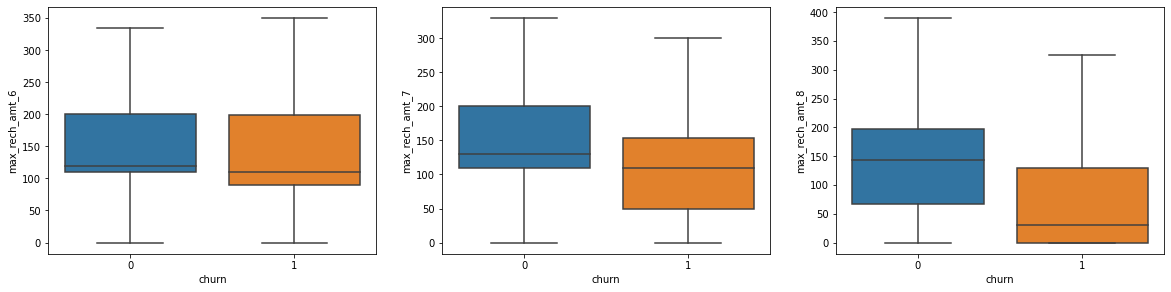

In [50]:
# Max Recharge amount

plot_box_chart('max_rech_amt')

We see a drop in the max recharge amount for churned customers in the 8th Month (Action Phase).

In [51]:
data_high_val_cust[['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']].isnull().sum() * 100 / len(data_high_val_cust)

max_rech_data_6    44.112443
max_rech_data_7    43.117551
max_rech_data_8    46.799987
dtype: float64

In [52]:
data_high_val_cust[['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16740.000000,17038.000000,15935.000000
mean,139.804002,140.444712,136.353373
std,118.892926,120.295284,119.571138
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


We would fill the null values with 0 indicating no recharge was done

In [54]:
data_high_val_cust['max_rech_data_6'].fillna(value=0, inplace=True)
data_high_val_cust['max_rech_data_7'].fillna(value=0, inplace=True)
data_high_val_cust['max_rech_data_8'].fillna(value=0, inplace=True)

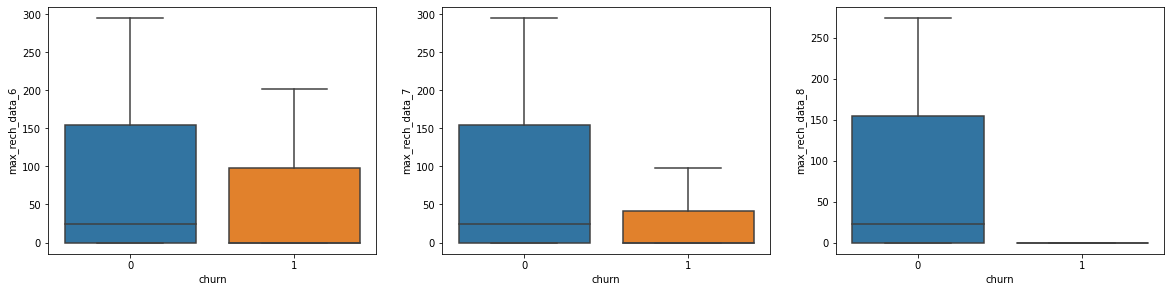

In [55]:
# max_rech_data

plot_box_chart('max_rech_data')

We see a huge drop in the recharge of data

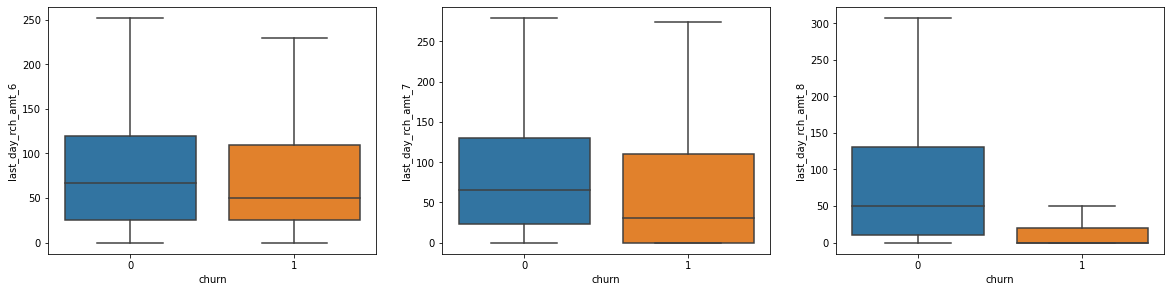

In [56]:
# last day recharge amount

plot_box_chart('last_day_rch_amt')

We see a huge drop in last day recharge amount

In [57]:
usage_2g_3g = data_high_val_cust.columns[data_high_val_cust.columns.str.contains('2g|3g',regex=True)]
usage_2g_3g

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object')

In [58]:
# Null value percentage of 2g 3g attributes

data_high_val_cust[usage_2g_3g].isnull().sum() * 100 / len(data_high_val_cust)

count_rech_2g_6    44.112443
count_rech_2g_7    43.117551
count_rech_2g_8    46.799987
count_rech_3g_6    44.112443
count_rech_3g_7    43.117551
count_rech_3g_8    46.799987
vol_2g_mb_6         0.000000
vol_2g_mb_7         0.000000
vol_2g_mb_8         0.000000
vol_3g_mb_6         0.000000
vol_3g_mb_7         0.000000
vol_3g_mb_8         0.000000
arpu_3g_6          44.112443
arpu_3g_7          43.117551
arpu_3g_8          46.799987
arpu_2g_6          44.112443
arpu_2g_7          43.117551
arpu_2g_8          46.799987
monthly_2g_6        0.000000
monthly_2g_7        0.000000
monthly_2g_8        0.000000
sachet_2g_6         0.000000
sachet_2g_7         0.000000
sachet_2g_8         0.000000
monthly_3g_6        0.000000
monthly_3g_7        0.000000
monthly_3g_8        0.000000
sachet_3g_6         0.000000
sachet_3g_7         0.000000
sachet_3g_8         0.000000
aug_vbc_3g          0.000000
jul_vbc_3g          0.000000
jun_vbc_3g          0.000000
sep_vbc_3g          0.000000
dtype: float64

In [59]:
# We will drop the 2g/2g related columns with more than 40% null values

data_high_val_cust.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'], axis=1, inplace=True)
data_high_val_cust.drop(['arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8'], axis=1, inplace=True)

In [60]:
data_high_val_cust.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8', 'avg_rech_amt_goodPhase', 'churn'],
      dtype='object', length=151)

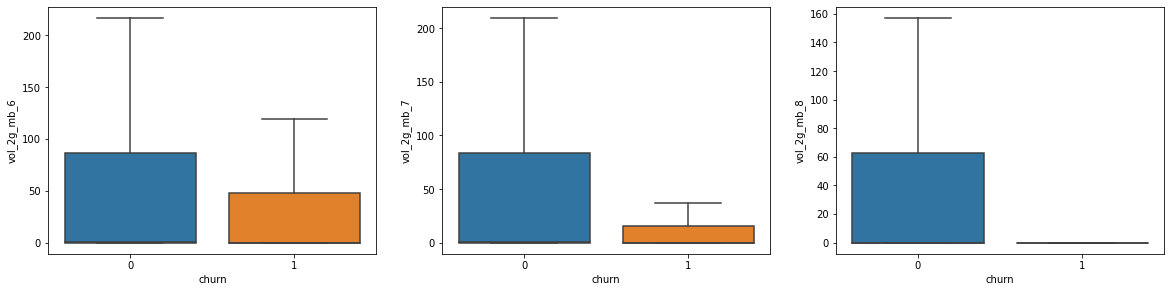

In [61]:
# vol_2g_mb

plot_box_chart('vol_2g_mb')

We see a huge drop in the 2g mobile internet usage in September

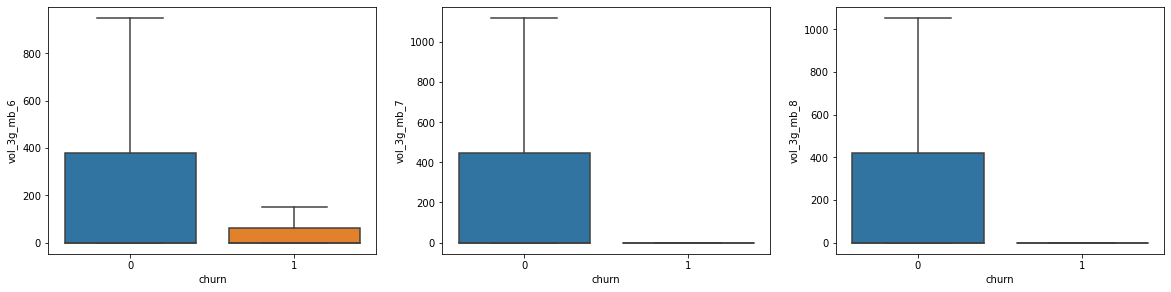

In [63]:
# vol_3g_mb

plot_box_chart('vol_3g_mb')

We see a drop in the 3g mobile internet usage in August & September

We see very less usage of 2g/3g mobile network in churned data this may denote that the churned customers are from areas where 2G/3G service is not properly available

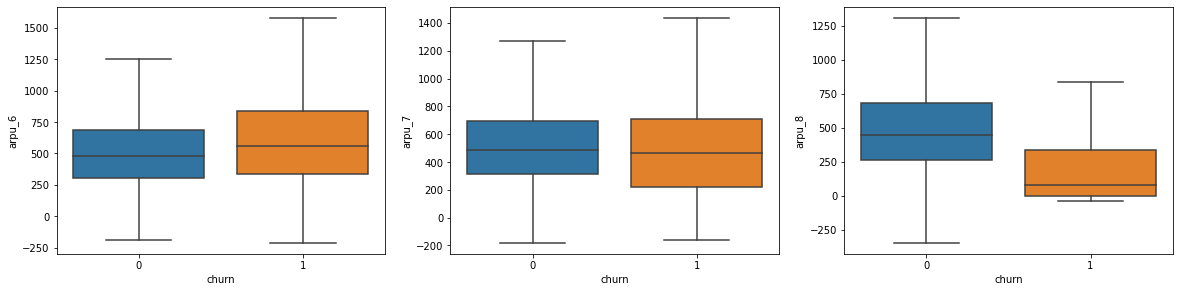

In [64]:
# Ploting for monthly subscription

plot_box_chart('arpu')

In [65]:
# minutes of usage

mou_cols = data_high_val_cust.columns[data_high_val_cust.columns.str.contains('mou')]
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [66]:
data_high_val_cust[mou_cols].isnull().sum() * 100 /len(data_high_val_cust)

onnet_mou_6     1.809502
onnet_mou_7     1.789470
onnet_mou_8     3.912797
offnet_mou_6    1.809502
offnet_mou_7    1.789470
                  ...   
spl_ic_mou_7    1.789470
spl_ic_mou_8    3.912797
isd_ic_mou_6    1.809502
isd_ic_mou_7    1.789470
isd_ic_mou_8    3.912797
Length: 81, dtype: float64

In [67]:
max(data_high_val_cust[mou_cols].isnull().sum() * 100 /len(data_high_val_cust))

3.91279671485327

Here the max of all minutes of usage columns is 3.91% 

In [68]:
# We can consider the customer has not used network at all for that particular call type, thus filling the missing values with 0

data_high_val_cust.loc[:,mou_cols] = data_high_val_cust.loc[:,mou_cols].replace(np.NaN,0)

In [69]:
mou_og_cols6 = data_high_val_cust.columns[data_high_val_cust.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [70]:
data_high_val_cust[mou_og_cols6].describe()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,26.596033,84.574122,163.309546,6.348347,1.577380,254.240239,165.897941,179.439168,1.806292,347.147123,2.174995,5.825077,610.058005
std,116.274169,228.962993,250.218928,22.139546,6.308138,378.546516,403.990737,409.143255,11.988810,608.845412,45.888834,17.579228,691.178402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.380000,19.210000,0.000000,0.000000,32.260000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,116.640000
50%,0.000000,24.360000,77.260000,0.000000,0.000000,124.590000,2.710000,16.360000,0.000000,45.080000,0.000000,0.230000,410.630000
75%,0.000000,78.060000,209.030000,4.230000,0.000000,332.310000,109.560000,154.540000,0.000000,465.290000,0.000000,5.210000,859.030000
max,3775.110000,6431.330000,4729.740000,1466.030000,271.440000,10643.380000,7366.580000,8314.760000,628.560000,8432.990000,5900.660000,1023.210000,10674.030000


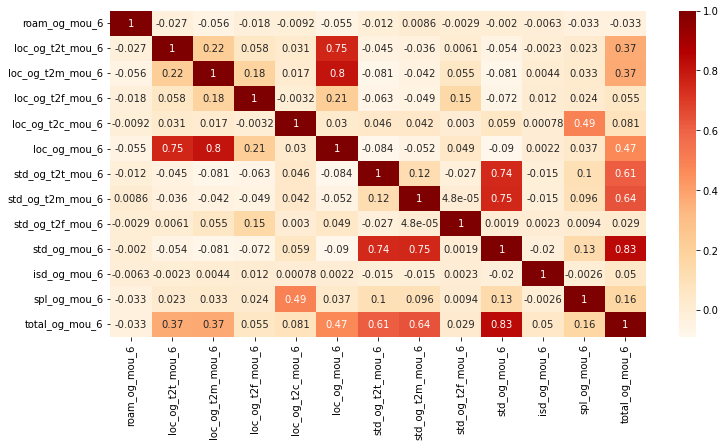

In [71]:
plt.figure(figsize=(12,6))
sns.heatmap(data_high_val_cust.filter(mou_og_cols6).corr(),cmap="OrRd",annot=True)
plt.show()

total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 have strong correlation with other fields

In [72]:
print(data_high_val_cust.loc[:,['total_og_mou_6','std_og_mou_6','loc_og_mou_6']])

       total_og_mou_6  std_og_mou_6  loc_og_mou_6
0                0.00          0.00          0.00
7              487.53         60.86        422.16
8              508.36        130.26        378.09
21             860.34        763.29         97.04
23             134.38          2.36        131.91
...               ...           ...           ...
99981          134.81          6.15        124.74
99984          464.58          0.03        441.96
99986         1600.79        284.39       1300.43
99988          375.78         67.66        308.11
99997            0.00          0.00          0.00

[29953 rows x 3 columns]


In [73]:
print(data_high_val_cust.loc[7,'total_og_mou_6'])
print(data_high_val_cust.loc[7,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())

487.53
487.52000000000004


In [74]:
print(data_high_val_cust.loc[7,'std_og_mou_6'])
print(data_high_val_cust.loc[7,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6']].sum())

60.86
60.849999999999994


In [75]:
print(data_high_val_cust.loc[7,'loc_og_mou_6'])
print(data_high_val_cust.loc[7,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6']].sum())

422.16
422.15


In [76]:
# total_og_mou_6, std_og_mou_6 and loc_og_mou_6 is a combination of other variables present in dataset.
# Drop redundant columns

total_og_cols = data_high_val_cust.columns[data_high_val_cust.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
data_high_val_cust.drop(total_og_cols,axis=1,inplace=True)
data_high_val_cust.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8', 'avg_rech_amt_goodPhase', 'churn'],
      dtype='object', length=142)

In [77]:
# Incoming MOU

mou_ic_cols6 = data_high_val_cust.columns[data_high_val_cust.columns.str.contains('.*_ic_.*mou_6',regex=True)]
data_high_val_cust[mou_ic_cols6].describe()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,16.124001,65.508916,150.474219,15.291721,231.284489,14.896832,29.212448,2.698829,46.811695,290.121569,0.061047,10.800999
std,76.344227,163.855393,219.321437,45.785255,315.005426,77.750215,98.279300,19.114766,137.597749,365.739944,0.188124,76.789627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.100000,28.090000,0.000000,47.910000,0.000000,0.000000,0.000000,1.030000,72.890000,0.000000,0.000000
50%,0.000000,25.080000,84.110000,1.840000,134.560000,0.380000,5.000000,0.000000,11.410000,183.780000,0.000000,0.000000
75%,0.000000,67.480000,188.740000,11.980000,297.260000,8.190000,23.630000,0.110000,41.490000,372.160000,0.000000,0.000000
max,2613.310000,6351.440000,4693.860000,1678.410000,7454.630000,5459.560000,4630.230000,1351.110000,5459.630000,7716.140000,19.760000,6789.410000


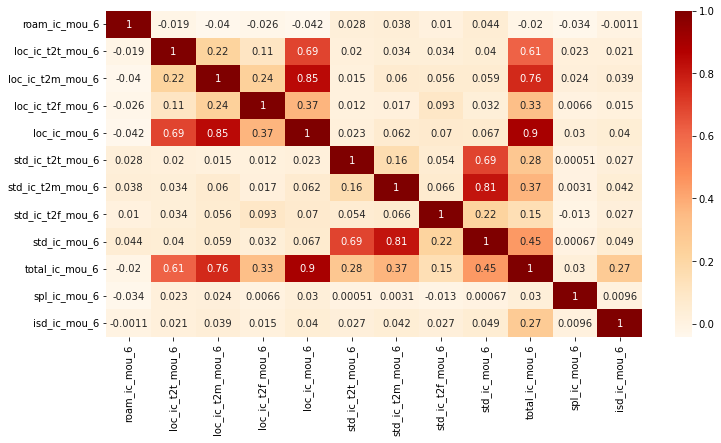

In [78]:
plt.figure(figsize=(12,6))
sns.heatmap(data_high_val_cust.filter(mou_ic_cols6).corr(),cmap='OrRd', annot=True)
plt.show()

We see high correlations  total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 with other fields

In [79]:
data_high_val_cust[['total_ic_mou_6','loc_ic_mou_6','std_ic_mou_6']].head()

,total_ic_mou_6,loc_ic_mou_6,std_ic_mou_6
0,0.00,0.00,0.00
7,626.46,427.88,180.54
8,103.86,81.43,22.43
21,207.09,125.33,81.76
23,119.58,116.63,2.94


In [80]:
print(data_high_val_cust.loc[7,'total_ic_mou_6'])
print(data_high_val_cust.loc[7,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())

626.46
626.92


In [81]:
print(data_high_val_cust.loc[7,'loc_ic_mou_6'])
print(data_high_val_cust.loc[7,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']].sum())

427.88
427.86


In [82]:
print(data_high_val_cust.loc[7,'std_ic_mou_6'])
print(data_high_val_cust.loc[7,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6']].sum())

180.54
180.51999999999998


In [83]:
# total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 is a combination of other variables present in dataset.
# Drop the redundant columns

total_ic_cols = data_high_val_cust.columns[data_high_val_cust.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
data_high_val_cust.drop(total_ic_cols,axis=1,inplace=True)
data_high_val_cust.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8', 'avg_rech_amt_goodPhase', 'churn'],
      dtype='object', length=133)

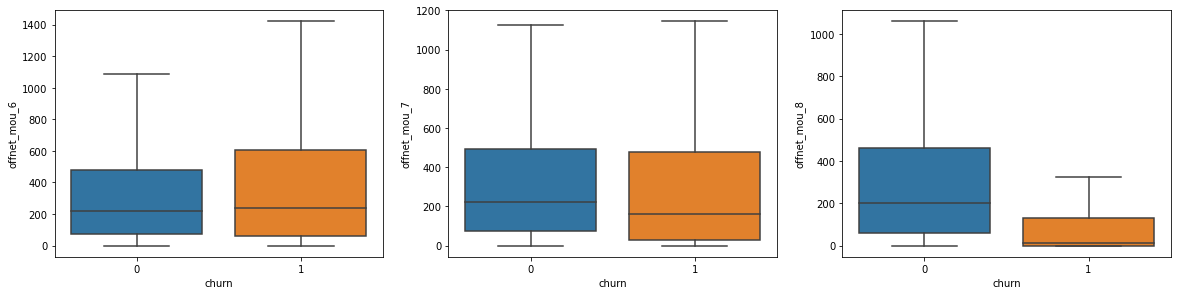

In [84]:
# Offnet mou values for churned and non churned customers

plot_box_chart('offnet_mou')

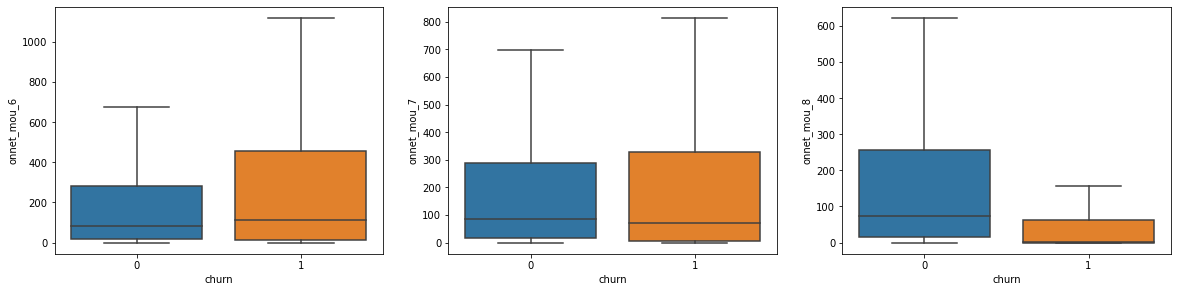

In [85]:
# Plotting onnet

plot_box_chart('onnet_mou')

We can see the drop in churned customers for both offnet and onnet customers in the 8th month 

In [86]:
tenure_data = data_high_val_cust.copy()
tenure_data['tenure'] = tenure_data['aon']/30
tenure_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,avg_rech_amt_goodPhase,churn,tenure
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1,32.266667
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1,26.733333
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,21.03,910.65,122.16,0.00,0.0,354.0,207.0,696.0,0,10.500000
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0,0,24.000000
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,40.45,51.86,0.00,0.00,0.0,712.0,540.0,583.0,0,20.133333


In [87]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)
tenure_data['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

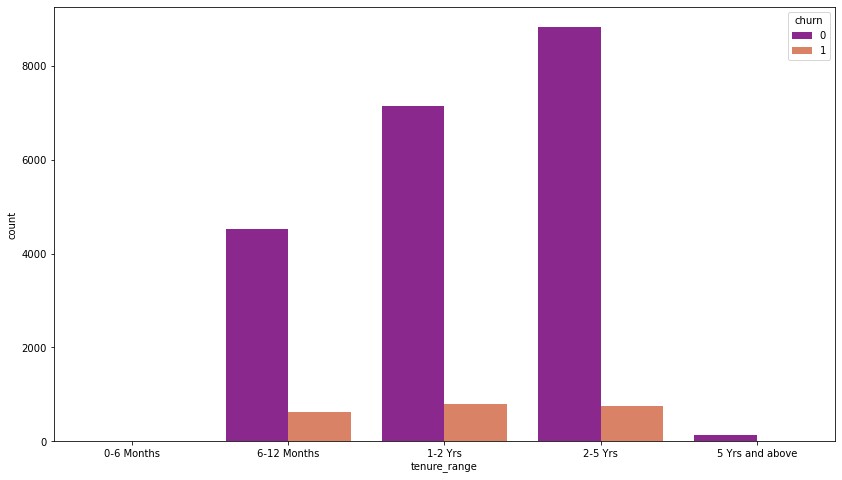

In [88]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("plasma"))
plt.show()

In [89]:
(data_high_val_cust.isnull().sum() * 100 / len(data_high_val_cust)).sort_values(ascending=False).head(15)

night_pck_user_8            46.799987
date_of_last_rech_data_8    46.799987
fb_user_8                   46.799987
fb_user_6                   44.112443
night_pck_user_6            44.112443
date_of_last_rech_data_6    44.112443
night_pck_user_7            43.117551
date_of_last_rech_data_7    43.117551
fb_user_7                   43.117551
ic_others_8                  3.912797
og_others_8                  3.912797
date_of_last_rech_8          1.943044
og_others_6                  1.809502
ic_others_6                  1.809502
ic_others_7                  1.789470
dtype: float64

In [90]:
# Drop all columns whose missing value % is above 40%

data_high_val_cust.drop(['night_pck_user_8','date_of_last_rech_data_8','fb_user_8','fb_user_6','night_pck_user_6','date_of_last_rech_data_6','night_pck_user_7','date_of_last_rech_data_7','fb_user_7'], axis=1, inplace=True)

In [91]:
data_high_val_cust.shape

(29953, 124)

In [92]:
numeric_col = data_high_val_cust.columns[data_high_val_cust.columns.str.contains('others')]
numeric_col

Index(['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8'],
      dtype='object')

In [93]:
data_high_val_cust[numeric_col].isnull().sum() * 100 / len(data_high_val_cust)

og_others_6    1.809502
og_others_7    1.789470
og_others_8    3.912797
ic_others_6    1.809502
ic_others_7    1.789470
ic_others_8    3.912797
dtype: float64

In [94]:
# since the % is very low we will impute value 0 in case of missing values

data_high_val_cust['og_others_6'].fillna(value=0.0, inplace=True)
data_high_val_cust['og_others_7'].fillna(value=0.0, inplace=True)
data_high_val_cust['og_others_8'].fillna(value=0.0, inplace=True)
data_high_val_cust['ic_others_6'].fillna(value=0.0, inplace=True)
data_high_val_cust['ic_others_7'].fillna(value=0.0, inplace=True)
data_high_val_cust['ic_others_8'].fillna(value=0.0, inplace=True)

In [95]:
data_high_val_cust[numeric_col].isnull().sum() * 100 / len(data_high_val_cust)

og_others_6    0.0
og_others_7    0.0
og_others_8    0.0
ic_others_6    0.0
ic_others_7    0.0
ic_others_8    0.0
dtype: float64

In [96]:
df_final = data_high_val_cust.copy()

In [97]:
# Drop columns which are not required

df_final.drop(['avg_rech_amt_goodPhase'], axis=1,inplace= True)
df_final.drop(df_final.filter(regex='date_'), axis=1,inplace= True)

In [98]:
df_final.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8', 'churn'],
      dtype='object', length=120)

In [99]:
# Take average of columns with month 6 and 7 and drop the individual attributes

col_list = df_final.filter(regex='_6|_7').columns.str[:-2] # leaving out churn
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_final[avg_col_name] = (df_final[col_6]  + df_final[col_7])/ 2

In [100]:
col_list_to_drop = df_final.filter(regex='_6|_7')
df_final.drop(col_list_to_drop,axis=1,inplace=True)

In [101]:
df_final.shape

(29953, 82)

In [102]:

df_final.columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'total_rech_amt_data_8',
       'churn', 'avg_arpu_av67', 'avg_onnet_mou_av67', 'avg_offnet_mou_av67',
       'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67',
       'avg_loc_og_t2t_mou_av67'

### Modeling

#### PCA

In [ ]:
pca_df = df_final.copy()

In [ ]:
pca_df.shape

In [ ]:

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from imblearn.over_sampling import SMOTE

def split_data(df):
    y = df['churn']
    X = df.drop(['churn'], axis=1)
    return X,y

def scale_data(X):
    scaler = StandardScaler()
    X_col = X.columns
    X_scaled = scaler.fit_transform(X)
    X_scale_final = pd.DataFrame(X_scaled, columns=X_col)
    return X_scale_final

def get_scree_plot(X):
    pca = PCA(random_state=42)
    pca.fit(X)
    fig = plt.figure(figsize=(8,6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('No. of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()
    return pca

def resampling_data(X, y, feature_number, train_size=0.7, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size, test_size=test_size, random_state=1)
    
    # normalizing imbalance - data is skewed
    #Initializing SMOTE: Synthetic Minority Over-sampling Technique
    smote = SMOTE(random_state = 42)
    X_tr,y_tr = smote.fit_resample(X_train,y_train)

    # Applying PCA : Pricnipal Component Analysis
    pca = IncrementalPCA(n_components=feature_number)    
    X_tr_pca = pca.fit_transform(X_tr)
    X_test_pca = pca.transform(X_test)

    return X_tr_pca,X_test_pca,y_tr,y_test

In [ ]:
X, y = split_data(pca_df)

In [ ]:
X.head(2)

In [ ]:
y.head(2)

In [ ]:
# Percentage of churn data
y.sum() * 100 / len(X)

In [ ]:
X_scaled = scale_data(X)
X_scaled.head(2)

In [ ]:
pca = get_scree_plot(X_scaled)

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)

In [ ]:
# 60 components are enough to describe 95% of the variance in the dataset.We'll choose 60 components for our modeling
X_train, X_test, y_train, y_test = resampling_data(X_scaled, y, 60)

In [ ]:
X_train.shape

In [ ]:
consolidate_summary = pd.DataFrame()

#### Modeling using various techniques 

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix

def get_regression_data(df):
    X,Y=split_data(df)
    x_train, x_test, y_train, y_test = resampling_data(scale_data(X),Y,60)
    return x_train, x_test, y_train, y_test

def plot_confusion_matrix(cm):
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def print_model_metrics(y_test, y_pred, model_name):
    print(model_name+" Model Stats Scores Summary : ")
    cp = confusion_matrix(y_test,y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cp, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    
    accuracy = round(accuracy_score(y_test,y_pred),2)
    recall = round(recall_score(y_test,y_pred),2)
    precision = round(precision_score(y_test,y_pred),2)
    auc = round(roc_auc_score(y_test,y_pred),2)
    f1 = round(f1_score(y_test,y_pred),2)
    
    data = [[model_name,accuracy,recall,precision,auc,f1]] 
    df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','AUC','F1'])
    add_to_global_summary(df)
    return df 

def add_to_global_summary(df) :
    global consolidate_summary 
    consolidate_summary = consolidate_summary.append(df,ignore_index=True)

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
model = lr.fit(X_train, y_train)
pred_probs_test = model.predict_proba(X_test)[:,1]
print('Accuracy {roc}'.format(roc=metrics.roc_auc_score(y_test, pred_probs_test)))

#### Tree Model

In [ ]:
tree_df = df_final.copy()

In [ ]:
X_train, X_test, y_train, y_test = get_regression_data(tree_df)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
print_model_metrics(y_test,predictions,"RandomForest (Default)")

In [ ]:
# Hyperparameters tuning

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV

def tune_hyperparameter(parameters, X_train, y_train, n_folds=5, max_depth=0):
    if (max_depth == 0):
        rf = RandomForestClassifier()
    else:
        rf = RandomForestClassifier(max_depth=max_depth)

    rf = GridSearchCV(rf, parameters, cv=n_folds, n_jobs=-1, scoring="accuracy", return_train_score= True)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    print('starting fit')
    rf.fit(X_train_scaled, y_train)
    print(' fit end ')
    scores = rf.cv_results_
    
    for key in parameters.keys():
        hyperparameters = key
        break

    # plotting accuracies for parameters
    plt.figure(figsize=(16,5))
    plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
    plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
    plt.xlabel(hyperparameters)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()


In [ ]:
# Tuning max_depth
parameters = {'max_depth': range(2, 40, 5)}
tune_hyperparameter(parameters, X_train, y_train)

We can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score becomes stagnant. 
The model tries to overfit as we increase the max_depth. 
Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest. 
12 and 18 value have peek convergence and can be used for grid view search.

In [ ]:
# Tuning n_estimators
parameters = {'n_estimators': range(100, 400, 100)}
tune_hyperparameter(parameters,X_train,y_train)

Score almost remain the same with very low dip throught the range. We wull use 200 for grid view search.

In [ ]:
# Tuning max_features
parameters = {'max_features': [20,30,40,50]}
tune_hyperparameter(parameters,X_train,y_train,4)

Apparently, accuracy of training seems to be stable and test scores seems to be gradual till 30 and then decrease. Again we see increase on 40 and we will use that.

In [ ]:
# Tuning min_samples_leaf
parameters = {'min_samples_leaf': range(10, 40, 10)}
tune_hyperparameter(parameters,X_train,y_train)

We can see that the model starts to overfit as value is decrease the value of min_samples_leaf. 10 to 20 seems to be a good range and that will be used in grid search.

In [ ]:
# Tuning min_samples_split
parameters = {'min_samples_split': range(10, 40, 10)}
tune_hyperparameter(parameters,X_train,y_train)

Range 10 to 30 is optimal with good accuracy.

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [12,18],
    'n_estimators': [200],
    'max_features': [40],
    'min_samples_leaf': [10,20],
    'min_samples_split': [10,20,30]
}
# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,return_train_score=True)

In [ ]:
rf_grid_search.fit(X_train, y_train)

In [ ]:
rf_grid_search.best_score_

In [ ]:
rf_grid_search.best_params_

In [ ]:
rfc = RandomForestClassifier(max_depth=18,
                             max_features=40,
                             min_samples_leaf=10,
                             min_samples_split=20,
                             n_estimators=200,
                             n_jobs = -1)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [ ]:
# Printing confusion matrix
print_model_metrics(y_test,predictions,'RandomForest (Hyper)')

#### XGBoost

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE

In [ ]:
xgboost_df = df_final.copy()
X_train, X_test, y_train, y_test = get_regression_data(xgboost_df)

In [ ]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
print_model_metrics(y_test, y_pred ,'XGBoost (Default)')

The roc_auc in this case is about 78% with default hyperparameters.

In [ ]:
# hyperparameter tuning with XGBoost

folds = 5
# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]}          

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

In [ ]:
model_cv.fit(X_train, y_train)   

In [ ]:
cv_results_xboost = pd.DataFrame(model_cv.cv_results_)
cv_results_xboost['param_learning_rate'] = cv_results_xboost['param_learning_rate'].astype('float')

In [ ]:
model_cv.best_score_

In [ ]:
model_cv.best_params_

In [ ]:
def plot_for_xboost(param_grid,cv_results):
    plt.figure(figsize=(18,5))
    for n, subsample in enumerate(param_grid['subsample']):
        # subplot 1/n
        plt.subplot(1,len(param_grid['subsample']), n+1)
        df = cv_results[cv_results['param_subsample']==subsample]

        plt.plot(df["param_learning_rate"], df["mean_test_score"])
        plt.plot(df["param_learning_rate"], df["mean_train_score"])
        plt.xlabel('learning_rate')
        plt.ylabel('AUC')
        plt.title("subsample={0}".format(subsample))
        plt.ylim([0.60, 1])
        plt.legend(['test score', 'train score'], loc='right')
        plt.xscale('log')

In [ ]:
param_grid1 = {'learning_rate': [0.1,0.2,0.3], 'subsample': [0.3,0.4,0.5]}  
plot_for_xboost(param_grid1,cv_results_xboost)

The results show that a subsample size of 0.5 and learning_rate of about 0.3 seems optimal. Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters).

In [ ]:
params = {'learning_rate': 0.3,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.5,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params,max_depth=2, n_estimators=200)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print_model_metrics(y_test, y_pred,'XGBoost (Hyper Tuned)')


In [ ]:
print("Important features ...")
plt.figure(figsize=(6,4))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("plasma"))
plt.show()


col = list(X_scaled.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(15)

## Final Analysis
Less number of **high value customer** are churing but for last **6 month** no new high valued cusotmer is onboarded which is concerning and company should concentrate on that aspect.

Customers with less than 4 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group.

Average revenue per user seems to be most important feature in determining churn prediction.

Incoming and Outgoing Calls on romaing for 8th month are strong indicators of churn behaviour

Local Outgoing calls made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.

Better 2G/3G area coverage where 2G/3G services are not good, it's strong indicator of churn behaviour.




### Model Insights

In [ ]:
consolidate_summary.head(10)

Random forest also produce good accuracy with 0.91 (default overfit model) and 0.90 with tuned hyperparameters.
XGBoost also produce good accuracy of 0.90 (default overfit model) and 0.86 with tuned hyperparameters.

As per our analysis Random forest produces best accuracy and models can be selected to predict churn data for future dataset or production.

                ---- End ----